## Collecting data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
%matplotlib inline


In [2]:
#collecting data
heart_failure= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_failure.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


 ## Data Wrangling

In [4]:
#checking for null data
heart_failure.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
heart_failure.shape

(299, 13)

## Analyzing data

([<matplotlib.axis.XTick at 0x1b82882f340>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Died')])

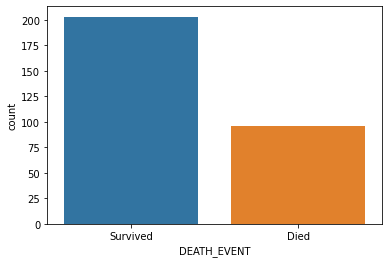

In [7]:
sns.countplot(x="DEATH_EVENT", data= heart_failure)
plt.xticks([0,1],['Survived','Died'])

([<matplotlib.axis.XTick at 0x1b828b45580>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Died')])

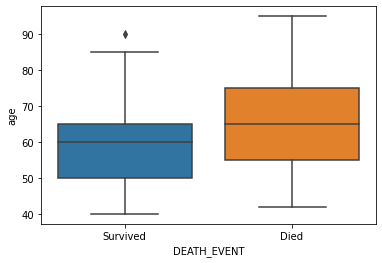

In [8]:
sns.boxplot(x="DEATH_EVENT", y="age", data= heart_failure)
plt.xticks([0,1],['Survived','Died'])

([<matplotlib.axis.XTick at 0x1b828bc41c0>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Died')])

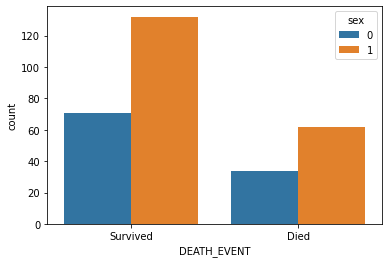

In [9]:
sns.countplot(x="DEATH_EVENT", hue= "sex", data= heart_failure)
plt.xticks([0,1],['Survived','Died'])

([<matplotlib.axis.XTick at 0x1b828c2db20>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Died')])

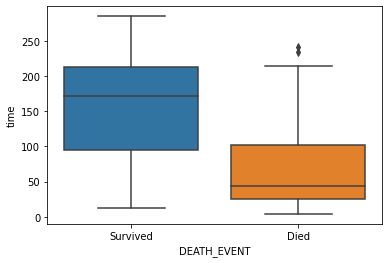

In [10]:
sns.boxplot(x="DEATH_EVENT", y= "time", data= heart_failure)
plt.xticks([0,1],['Survived','Died'])

([<matplotlib.axis.XTick at 0x1b828c9aee0>,
 [Text(0, 0, 'Survived'), Text(1, 0, 'Died')])

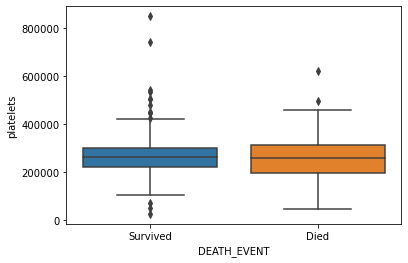

In [11]:
sns.boxplot(x="DEATH_EVENT", y= "platelets", data= heart_failure)
plt.xticks([0,1],['Survived','Died'])

## Train and Test Data

In [12]:
#Train and Test data

x= heart_failure.drop("DEATH_EVENT",axis=1)
y= heart_failure["DEATH_EVENT"]


In [13]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [16]:
predictions= pipe.predict(x_test)
pipe.score(x_test, y_test)

0.8333333333333334

In [17]:
#calculate classification report
classification_report(y_test,predictions)


'              precision    recall  f1-score   support\n\n           0       0.86      0.92      0.89        64\n           1       0.76      0.62      0.68        26\n\n    accuracy                           0.83        90\n   macro avg       0.81      0.77      0.78        90\nweighted avg       0.83      0.83      0.83        90\n'